## Project on Text Processing

About data : I have taken 2 datasets,

1- Job description data

2- Resume data

## Working on Job Description data

In [2]:
#Importing necessary libarries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import seaborn as sns
import re

In [31]:
# Job description and resume data strored in my local storage as 'job_Data.csv' and resume_dataset.
# Reading the CSV files using pandas

job_des = pd.read_csv("C:\\Users\\tharu\\OneDrive\\Desktop\\projets\\job_Data.csv")
resume = pd.read_csv("C:\\Users\\tharu\\OneDrive\\Desktop\\projets\\Resume_dataSet.csv", encoding='utf-8')

In [32]:
resume.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [33]:
job_des.head()

,job_ID,designation,company_id,name,work_type,involvement,employees_count,total_applicants,linkedin_followers,job_description,details_id,industry,level,City,State
0,3471657636,Data Science,524,Crossover,Remote,Full-time,1001,200,5.395547e+06,About the job Crossover is the world's #1 sour...,2697,IT Services and IT Consulting,Associate,Delhi,Delhi
1,3471669068,Data Science,524,Crossover,Remote,Full-time,1001,184,5.395547e+06,About the job Crossover is the world's #1 sour...,2724,IT Services and IT Consulting,Associate,New Delhi,Delhi
2,3474349934,Data Science,2242,Uplers,Remote,Full-time,1001,200,9.821152e+05,About the job Profile: ML EngineersExperience:...,3668,IT Services and IT Consulting,Mid-Senior level,Greater Bengaluru Area,Karnataka
3,3472816027,Data Science,1553,PVAR SERVICES,On-site,Full-time,1,200,2.094000e+03,About the job Designation: Data ScienceLocatio...,3083,Not Avilable,Not Avilable,Gurugram,Haryana
4,3473311511,Data Science,2147,Timeline Freight Brokers,On-site,Full-time,1,8,9.821152e+05,About the job The ideal candidate will use the...,3359,Not Avilable,Not Avilable,Mohali district,North West


In [34]:
# Checking shapes the data
print("Shape of the job data --------> ", job_des.shape)
print("Shape of the resume data --------> ", resume.shape)


Shape of the job data -------->  (100, 15)
Shape of the resume data -------->  (161, 2)


In [35]:
# Dropping the unnecessary columns in job description

job_des.drop(['job_ID', 'work_type', 'involvement', 'company_id', 'name', 'employees_count', 'total_applicants', 
             'linkedin_followers', 'details_id', 'industry', 'level','City', 'State' ], axis=1, inplace= True)

In [36]:
job_des.head()

,designation,job_description
0,Data Science,About the job Crossover is the world's #1 sour...
1,Data Science,About the job Crossover is the world's #1 sour...
2,Data Science,About the job Profile: ML EngineersExperience:...
3,Data Science,About the job Designation: Data ScienceLocatio...
4,Data Science,About the job The ideal candidate will use the...


In [38]:
# For the 'job_description' and Resume columns we are doing the text cleaning
# By removing URLs, RT,cc, hashtags,mentions, punctuations, whitespaces.

def cleanJob(JobText):
    JobText = re.sub('httpS+s*', ' ', JobText)  # remove URLs
    JobText = re.sub('RT|cc', ' ', JobText)  # remove RT and cc
    JobText = re.sub('#S+', '', JobText)  # remove hashtags
    JobText = re.sub('@S+', '  ', JobText)  # remove mentions
    JobText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', JobText)  # remove punctuations
    JobText = re.sub(r'[^x00-x7f]',r' ', JobText)
    JobText = re.sub('s+', ' ', JobText)  # remove extra whitespace
    return JobText
job_des['Cleaned_Job_Text'] = job_des.job_description.apply(lambda x: cleanJob(x))


import re
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText) 
    resumeText = re.sub('s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
resume['Cleaned_Resume'] = resume.Resume.apply(lambda x: cleanResume(x))


In [39]:
# Saving the both cleaned datasets
job_des.to_csv("New_job_des.csv", index= False)
resume.to_csv("New_resume.csv", index= False)

In [40]:
# Reading the bothe new datasets

new_job_des = pd.read_csv("C:\\Users\\tharu\\OneDrive\\Documents\\VS Code file\\New_Projects\\New_job_des.csv")
new_resume = pd.read_csv("C:\\Users\\tharu\\OneDrive\\Documents\\VS Code file\\New_Projects\\New_resume.csv")

In [41]:
# Checking the count of designations in the jobs dataset

desg = new_job_des["designation"].value_counts()
desg

Data Science            29
Other Developer         19
Other                    9
Salesforce Developer     8
Database Developer       4
Cloud Engineer           4
SQL Developer            3
Python Developer         3
Java Developer           3
.Net Developers          2
Shopify Developer        2
Software Engineer        2
Angular Developer        2
PHP Developer            1
Other Engineering        1
Lead developer           1
PowerApps Developer      1
Golang Developer         1
Snowflake Developer      1
Oracle Developer         1
DevOps Engineer          1
Software Testing         1
Internships              1
Name: designation, dtype: int64

<AxesSubplot: >

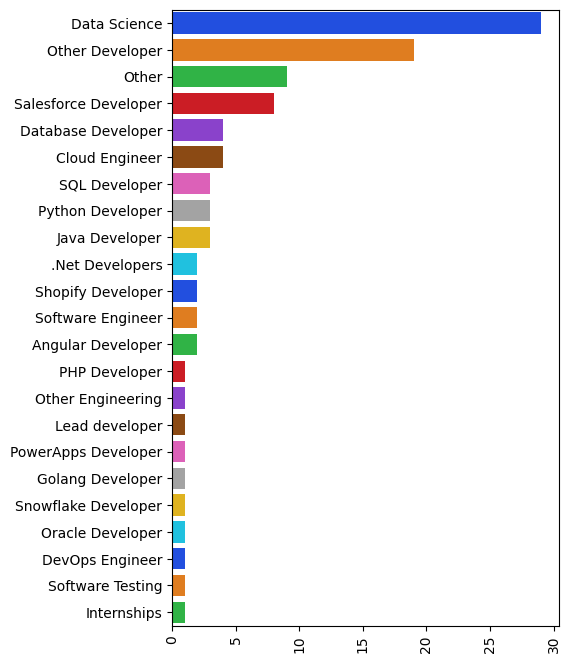

In [42]:
# Visualizing the designations 
plt.figure(figsize=(5,8))
plt.xticks(rotation=90)
sns.barplot(x= desg.values, y= desg.index, data= new_job_des, palette= "bright")

In [43]:
# Counting the category of the resumes

cat = new_resume.Category.value_counts()
cat

Sales                        9
Business Analyst             9
Advocate                     8
Arts                         8
Java Developer               8
Automation Testing           7
Database                     7
Mechanical Engineer          7
Health and fitness           7
Civil Engineer               7
SAP Developer                7
Electrical Engineering       7
Python Developer             6
Network Security Engineer    6
DevOps Engineer              6
Data Science                 6
Operations Manager           6
HR                           6
Web Designing                6
PMO                          5
ETL Developer                5
DotNet Developer             5
Blockchain                   5
Hadoop                       4
Testing                      4
Name: Category, dtype: int64

<AxesSubplot: >

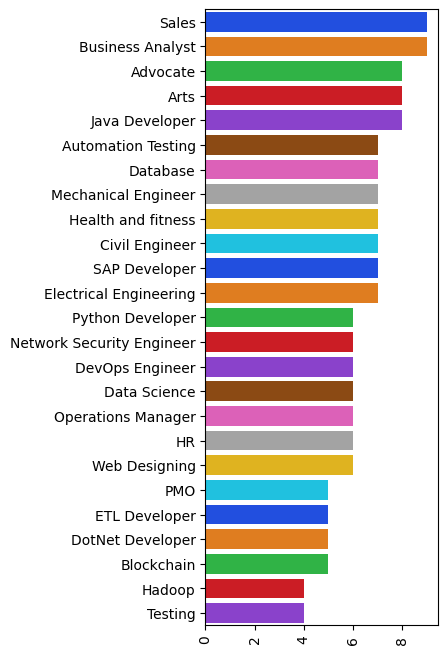

In [44]:
# Visualizing the designations 
plt.figure(figsize=(3,8))
plt.xticks(rotation=90)
sns.barplot(x= cat.values, y= cat.index, data= resume, palette= "bright")

In [45]:
print(f"Length of the Job dataset: {len(new_job_des)}",'\n',f"Length of the resume dataset: {len(new_resume)}")

Length of the Job dataset: 100 
 Length of the resume dataset: 161


Converting column into single text

In [46]:
# Here by using the length of job_des converting whole column 
# of Cleaned_Job_Text and cleaned resume into single texts

job_text=" "
for i in range(0,100):
    job_text= job_text + new_job_des["Cleaned_Job_Text"][i]

res_text=" "
for i in range(0,161):
    res_text= res_text+ new_resume["Cleaned_Resume"][i]

In [47]:
job_text[1:20]

'About the job Cro o'

In [48]:
res_text[1:20]

'Skill    Programmin'

### Tokenization

In [67]:
# Using the NLTK library tokenizing the text
tokenizer = nltk.WordPunctTokenizer()

job_tokens = tokenizer.tokenize(job_text)
print("Length of the tokens ---> ", len(job_tokens))

res_tokens = tokenizer.tokenize(res_text)
print("Length of the tokens ---> ", len(res_tokens))

Length of the tokens --->  27930
Length of the tokens --->  78530


In [90]:
#For Normalization now we shall make everything lowercase for uniformity
#to hold the new lower case words
job_words = []
# Looping through the tokens and make them lower case
for job_word in job_tokens:
    job_words.append(job_word.lower())

res_words = []
for res_word in res_tokens:
    res_words.append(res_word.lower())

In [91]:
print(f"Length of the job words : {len(job_words)}",'and', f"Length of the resume words : {len(res_words)}")

Length of the job words : 27930 and Length of the resume words : 78530


In [92]:
# Lemmatizing the text
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer()
# for Job text
lem_job_words=[]
for word in job_words:
    word=wn.lemmatize(word)
    lem_job_words.append(word)
same=0
diff=0
for i in range(0,27930):
    if(lem_job_words[i]==job_words[i]):
        same=same+1
    elif(lem_job_words[i]!=job_words[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)


# For resume text
lem_res_words=[]
for word in res_words:
    word=wn.lemmatize(word)
    lem_res_words.append(word)
same=0
diff=0
for i in range(0,78530):
    if(lem_res_words[i]==res_words[i]):
        same=same+1
    elif(lem_res_words[i]!=res_words[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 89
Number of words not Lemmatized= 27841
Number of words Lemmatized= 458
Number of words not Lemmatized= 78072


In [93]:
lem_res_words[1:5]

['programming', 'language', 'p', 'thon']

In [101]:
# Saving the Tokanized data.
import csv

job_file = "job_words.csv"
res_file = "res_words.csv"

with open(job_file, 'w', newline='', encoding='utf-8') as job_csvfile:
    csv_writer = csv.writer(job_csvfile)

    for row in lem_job_words:
        csv_writer.writerow(row)

with open(res_file, 'w', newline='', encoding='utf-8') as res_csvfile:
    csv_writer = csv.writer(res_csvfile)

    for row in lem_res_words:
        csv_writer.writerow(row)

print(f'Tokens have been saved to {job_file}')
print(f'Tokens have been saved to {res_file}')

Tokens have been saved to job_words.csv
Tokens have been saved to res_words.csv


### StopWords removal

In [105]:
#Stop words are generally the most common words in a language.
# Reading the job tokens
job_tok_file = []
with open("C:\\Users\\tharu\\OneDrive\\Documents\\VS Code file\\New_Projects\\job_words.csv", 'r') as j_csvfile:
    j_reader = csv.reader(j_csvfile)
    for row in j_reader:
        job_tok_file.append(''.join(row))


# Reading the resume tokens
res_tok_file = []
with open("C:\\Users\\tharu\\OneDrive\\Documents\\VS Code file\\New_Projects\\res_words.csv", 'r') as r_csvfile:
    r_reader = csv.reader(r_csvfile)
    for row in r_reader:
        res_tok_file.append(''.join(row))


#English stop words from nltk.
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

New_job_words = []
New_res_words = []

#Now we need to remove the stop words from the words variable
#Appending to New_job_words all words that are in job_words but not in sw
# For Job text
for word in job_tok_file:
    if word not in stop_words:
        New_job_words.append(word)

# For Resume text
for word in res_tok_file:
    if word not in stop_words:
        New_res_words.append(word)

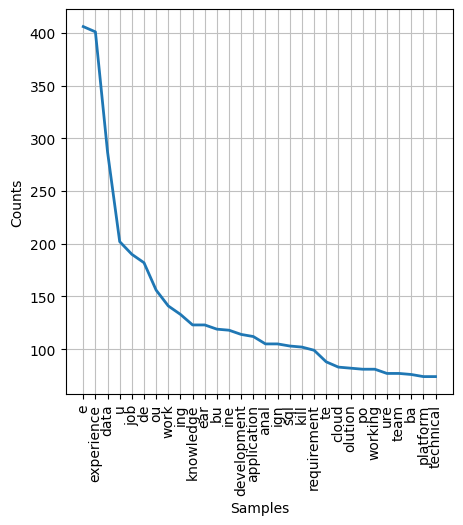

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [108]:
#The frequency distribution of the words
job_freq_dist = nltk.FreqDist(New_job_words)
#Frequency Distribution Plot
plt.subplots(figsize=(5,5))
job_freq_dist.plot(30)

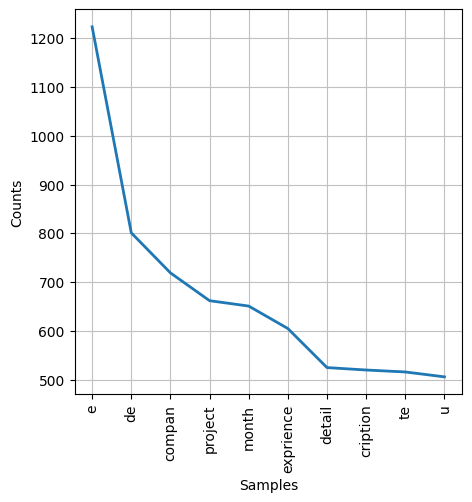

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [109]:
#The frequency distribution of the words
res_freq_dist = nltk.FreqDist(New_res_words)
#Frequency Distribution Plot
plt.subplots(figsize=(5,5))
res_freq_dist.plot(10)

## TF-IDF

TF-IDF frequency on Job text

Vectorizing

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import linear_kernel

vectorizer = TfidfVectorizer(max_features= 100)
job_tfidf_matrix = vectorizer.fit_transform(New_job_words)
res_tfidf_matrix = vectorizer.fit_transform(New_res_words)

In [112]:
# # Reduce dimensionality
from sklearn.decomposition import IncrementalPCA
from scipy.sparse import csr_matrix

tfidf_matrix_job_sparse = csr_matrix(job_tfidf_matrix)
tfidf_matrix_resume_sparse = csr_matrix(res_tfidf_matrix)

# Incremental PCA
inc_pca = IncrementalPCA(n_components= 50)

inc_pca.fit(job_tfidf_matrix.toarray())
job_tfidf_matrix_reduc = inc_pca.transform(job_tfidf_matrix.toarray())

inc_pca.fit(res_tfidf_matrix.toarray())
res_tfidf_matrix_reduc = inc_pca.transform(res_tfidf_matrix.toarray())

Cosine similarity

In [113]:
# # Calculating the Cosins similarity
cosine_similarities = linear_kernel(res_tfidf_matrix_reduc, job_tfidf_matrix_reduc)

In [114]:
print("Cosine similarity score:", cosine_similarities)

Cosine similarity score: [[-0.00887363 -0.00105454 -0.00105454 ... -0.00105454 -0.00105454
  -0.00105454]
 [-0.00630009  0.00071736  0.00071736 ...  0.00071736  0.00071736
   0.00071736]
 [-0.00630009  0.00071736  0.00071736 ...  0.00071736  0.00071736
   0.00071736]
 ...
 [-0.0072386   0.00107391  0.00107391 ...  0.00107391  0.00107391
   0.00107391]
 [-0.00630009  0.00071736  0.00071736 ...  0.00071736  0.00071736
   0.00071736]
 [-0.00586738 -0.00409877 -0.00409877 ... -0.00409877 -0.00409877
  -0.00409877]]


In [115]:
job_indices = pd.Series(job_des.index, index= job_des['job_description'])
res_indices = pd.Series(resume.index, index= resume['Resume'])


In [116]:
job_indices

job_description
About the job Crossover is the world's #1 source of full-time remote jobs. Our clients offer top-tier pay for top-tier talent. We're recruiting this role for our client, Trilogy. Have you got what it takes? Are you looking for an entry-level role in the software industry that will give you the skills and exposure to move into any speciality later? We’re looking for curious individuals who love searching for meaningful answers. In this role, you’ll be given a business problem and will scour the internet for possible solutions. The problems will come from every area of our business: operations, finance, hiring, engineering, and more - giving you broad exposure. Not only will you gain knowledge, you’ll receive regular coaching and training from a team of global tech experts and operations professionals. Jumpstart your career with us today! What You Will Be Doing Research a variety of high-priority topics that are critical to the businessEvaluate results against provided ev

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Example job description and resume
job_description = "We are looking for a data scientist with expertise in statistical analysis and machine learning."
resume = "Experienced data scientist proficient in statistical analysis and machine learning techniques."

# Tokenize and create vectors for job description and resume
vectorizer = CountVectorizer()
job_vector = vectorizer.fit_transform([job_description, resume])

# Calculate cosine similarity
similarity_matrix = cosine_similarity(job_vector)

# Extract similarity score
skill_similarity = similarity_matrix[0, 1]

print("Skill Similarity:", skill_similarity)


Skill Similarity: 0.6446583712203041


In [119]:
from sklearn.metrics.pairwise import linear_kernel

# Iterate through each job description
for i in range(len(job_des)):
    # Compute cosine similarities for the i-th job description
    cosine_similarities = linear_kernel(res_tfidf_matrix_reduc[i:i+1], job_tfidf_matrix_reduc).flatten()

    # Get the indices of top N resumes
    top_resumes_indices = cosine_similarities.argsort()[::-1]

    # Number of top resumes to recommend
    top_n = 2

    # Display the top N resumes for the i-th job description
    print(f"\nTop {top_n} Resumes for Job Description {i + 1}:")
    for j in range(top_n):
        if top_resumes_indices[j] < len(resume):
            resume_index = top_resumes_indices[j]
            print(f"{j + 1}. Resume Set {resume_index + 1}, Resume {resume_index + 1}: {resume[resume_index]}")
        else:
            print(f"{j + 1}. No valid resume found for index {top_resumes_indices[j]}")



Top 2 Resumes for Job Description 1:
1. No valid resume found for index 14588
2. No valid resume found for index 8919

Top 2 Resumes for Job Description 2:
1. No valid resume found for index 19563
2. No valid resume found for index 5556

Top 2 Resumes for Job Description 3:
1. No valid resume found for index 19563
2. No valid resume found for index 5556

Top 2 Resumes for Job Description 4:
1. No valid resume found for index 19563
2. No valid resume found for index 5556

Top 2 Resumes for Job Description 5:
1. No valid resume found for index 1938
2. No valid resume found for index 5159

Top 2 Resumes for Job Description 6:
1. No valid resume found for index 19563
2. No valid resume found for index 5556

Top 2 Resumes for Job Description 7:
1. No valid resume found for index 19563
2. No valid resume found for index 5556

Top 2 Resumes for Job Description 8:
1. No valid resume found for index 19563
2. No valid resume found for index 5556

Top 2 Resumes for Job Description 9:
1. No valid